# Scientific Programming in Python (SPiP) - Numpy Exercises


by [Michael Granitzer (michael.granitzer@uni-passau.de)](http://www.mendeley.com/profiles/michael-granitzer/) 

[Konstantin Ziegler (konstantin.ziegler@uni-passau.de)](http://zieglerk.net)

__License__


This work is licensed under a [Creative Commons Attribution 3.0 Unported License](http://creativecommons.org/licenses/by/3.0/)

# Exercises

Use the [Python 101 Cheatsheet](http://nbviewer.ipython.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/Python_101.ipynb) as reference

##Exercise 3.1.a: Data Structures in Numpy

  
Given is the following table with data on when someone likes to play tennis.


<table border="" cellspacing="0" width="48%">
  <tbody><tr>
      <td><b>Day</b></td>
      <td><b>outlook</b></td>
      <td><b>temperature</b></td>
      <td><b>humidity</b></td>
      <td><b>windy</b></td>
      <td><b>play</b></td>
    </tr>

    <tr>
      <td>1</td>
      <td>sunny</td>
      <td>85</td>

      <td>85</td>

      <td>false</td>

      <td>no</td>
    </tr>

    <tr>
      <td>2</td>

      <td>sunny</td>

      <td>80</td>

      <td>90</td>

      <td>true</td>

      <td>no</td>
    </tr>

    <tr>
      <td>3</td>

      <td>overcast</td>

      <td>83</td>

      <td>86</td>

      <td>false</td>

      <td>yes</td>
    </tr>

    <tr>
      <td>4</td>

      <td>rainy</td>

      <td>70</td>

      <td>96</td>

      <td>false</td>

      <td>yes</td>
    </tr>

    <tr>
      <td>5</td>

      <td>rainy</td>

      <td>68</td>

      <td>80</td>

      <td>false</td>

      <td>yes</td>
    </tr>

    <tr>
      <td>6</td>

      <td>rainy</td>

      <td>65</td>

      <td>70</td>

      <td>true</td>

      <td>no</td>
    </tr>

    <tr>
      <td>7</td>

      <td>overcast</td>

      <td>64</td>

      <td>65</td>

      <td>true</td>

      <td>yes</td>
    </tr>

</tbody></table>


* Represent the following table using numpy data structures (i.e. a list of numpy arrays or a dict of numpy arrays)
* Given that data structure
  - Calculate the mean temperature and mean humidity
  - Print outlook and play for those days where the temperature is greater than the average temperature
  - Print outlook and play for those days where the humidity is greater than the average humidity
  - Convert the temperatur to celcius and add a new column therefore in the table. Use the following conversion equation $$ C=(F-32) *5/9$$
  
Note: You can take advantage of the already existing Python data structures from Exercise 2-1

    data = [[1,"sunny",85,85,"false","no"]
       ,[2,"sunny",80,90,True,"no"]
       ,[3,"overcast",83,86,False,"yes"]
       ,[4,"rainy",70,96,False,"yes"]
       ,[5,"rainy",68,80,False,"yes"]
       ,[6,"rainy",65,70,True,"no"]
       ,[7,"overcast",64,65,True,"yes"]]

##Exercise 3.1.b: Simple aggregations in Numpy

Use the weather data from exercise 3.1.a and complete the following tasks using the numpy data structures:

1. How often do you play tennis independent of the other attributes?
2. How often do you play tennis when it is "sunny"?
3. Compare the average, minimum and maximum temperature when you play tennis?
4. Compare the average, minimum and maximum humidity when you play tennis?
5. Plot the an scatter plot (x,y diagramm) of humidity (x) and temperatur (y) when you play tennis compared to when you do not play tennis. Use the following lines of code for a plot:

     <pre><code>
     %pylab inline
     from pylab import *
     figure()
     plot(xdata,ydata)
     title("Title goes here")
     show()</code></pre>

#Solutions

## Solution 3.1.a: Data Structures in Numpy

In [1]:
import numpy as np
labels = np.array(["Day",	"outlook",	"temperature",	"humidity",	"windy",	"play"])
data = [[1,"sunny",85,85,"false","no"]
   ,[2,"sunny",80,90,True,"no"]
   ,[3,"overcast",83,86,False,"yes"]
   ,[4,"rainy",70,96,False,"yes"]
   ,[5,"rainy",68,80,False,"yes"]
   ,[6,"rainy",65,70,True,"no"]
   ,[7,"overcast",64,65,True,"yes"]]

# iterate over all row and select the ith attribute where i goes from 0 to the number of columns
res = [np.array([row[i] for row in data]) for i in range(len(data[0]))]
print(res)

[array([1, 2, 3, 4, 5, 6, 7]), array(['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast'], 
      dtype='<U8'), array([85, 80, 83, 70, 68, 65, 64]), array([85, 90, 86, 96, 80, 70, 65]), array(['false', 'True', 'False', 'False', 'False', 'True', 'True'], 
      dtype='<U5'), array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes'], 
      dtype='<U3')]


In [2]:
#define a helper function for less syntactic sugar
def sel(attribute):
    return np.where(labels==attribute)[0]


In [3]:
#Calculate the mean temperature and mean humidity
print(sel("temperature"))
mean_temp = res[sel("temperature")].mean()
print("Mean temperatur=%f"%(mean_temp))
mean_hum= res[sel("humidity")].mean()
print("Mean humidity=%f"%(mean_hum))

#Print outlook and play for those days where the temperature is greater than the average temperature
idx = res[sel("temperature")]>mean_temp
print("Outlook for above average temperature:",res[sel("outlook")][idx])
print("Play for above average temperature:",res[sel("play")][idx])

#Print outlook and play for those days where the humidity is greater than the average humidity
idx = res[sel("humidity")]>mean_hum
print("Outlook for above average humidty:",res[sel("outlook")][idx])
print("Play for above average humidity:",res[sel("play")][idx])
#Convert the temperatur to farenheit and add a new column therefore in the table. Use the following conversion equation
#C=(F−32)∗5/9
res.append((res[sel("temperature")]-32.0)*5.0/9.0)
labels = np.append(labels, ["temperaturCelsius"])
print("New Labels:", labels)
print("New Data:", res)


[2]
Mean temperatur=73.571429
Mean humidity=81.714286
Outlook for above average temperature: ['sunny' 'sunny' 'overcast']
Play for above average temperature: ['no' 'no' 'yes']
Outlook for above average humidty: ['sunny' 'sunny' 'overcast' 'rainy']
Play for above average humidity: ['no' 'no' 'yes' 'yes']
New Labels: ['Day' 'outlook' 'temperature' 'humidity' 'windy' 'play'
 'temperaturCelsius']
New Data: [array([1, 2, 3, 4, 5, 6, 7]), array(['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast'], 
      dtype='<U8'), array([85, 80, 83, 70, 68, 65, 64]), array([85, 90, 86, 96, 80, 70, 65]), array(['false', 'True', 'False', 'False', 'False', 'True', 'True'], 
      dtype='<U5'), array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes'], 
      dtype='<U3'), array([ 29.44444444,  26.66666667,  28.33333333,  21.11111111,
        20.        ,  18.33333333,  17.77777778])]


/home/zieglerk/local/share/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  app.launch_new_instance()
/home/zieglerk/local/share/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/home/zieglerk/local/share/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/home/zieglerk/local/share/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/home/zieglerk/local/share/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: converting an array with ndim > 0 to an index wil

## Solution 3.1.b: Simple aggregations in Numpy

In [8]:
print("I played tennis %d times"%np.sum(res[sel("play")]=="yes"))
print("I played tennis %d times when its sunny"%np.sum(np.multiply(res[sel("play")]=="yes",res[sel("outlook")]=="sunny")))

I played tennis 4 times
I played tennis 0 times when its sunny


/home/zieglerk/local/share/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  if __name__ == '__main__':
/home/zieglerk/local/share/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  from ipykernel import kernelapp as app


temperature mean=71.250000,min=64.000000,max=83.000000
humidity mean=81.750000,min=65.000000,max=96.000000


/home/zieglerk/local/share/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  from ipykernel import kernelapp as app
/home/zieglerk/local/share/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/home/zieglerk/local/share/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


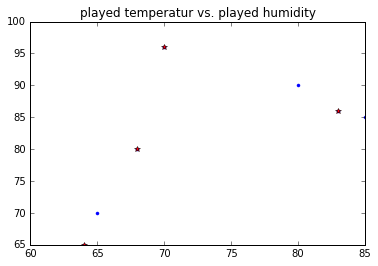

In [14]:
#3. Compare the average, minimum and maximum temperature when you play tennis?
played_temp = res[sel("temperature")][res[sel("play")]=="yes"]
print("temperature mean=%f,min=%f,max=%f"%(played_temp.mean(),played_temp.min(),played_temp.max()))
#4. Compare the average, minimum and maximum humidity when you play tennis?
played_hum = res[sel("humidity")][res[sel("play")]=="yes"]
print("humidity mean=%f,min=%f,max=%f"%(played_hum.mean(),played_hum.min(),played_hum.max()))
#5. Plot the an scatter plot (x,y diagramm) of humidity (x) and temperatur (y) when you play tennis compared to when you do not play tennis. Use the following lines of code for a plot:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(res[sel("temperature")],res[sel("humidity")], "b.")
plt.plot(played_temp,played_hum,"r*")
plt.title("played temperatur vs. played humidity")
plt.show()
